In [1]:
#  preliminary stuff, feel free to ignore

from sympy import *
init_printing(use_unicode = True)
x, v, lam = symbols('x v lam')
import sympy
e = sympy.E
from math import log
import numpy as np
import matplotlib.pyplot as plt

p = x**(v/2 - sympy.Integer(1)) * e**(-x/2) / (2 ** (v/2) * factorial(v/2 - sympy.Integer(1)))
q = lam*e ** (-lam*x)
exp = p / q
df= diff(exp, x)
x_0 = solve(df,x)[0]
M_lambda = exp.subs(x, x_0)

In [2]:
dM = diff(M_lambda, lam)
lam_0 = solve(dM, lam)[0]
lam_0

# Code for Q1

Acceptance rate: 0.6800038080213249
Theoretical acceptance rate: 0.6795704571147613


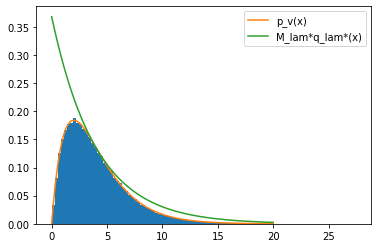

In [3]:
#  returns a sample from Exp(lam)
def exponential_sampler(lam):
    # given cdf of exponential is 1-e^{-lamx}
    
    f = lambda x: -log(1-x)/lam
    return f(np.random.uniform())

#  evaluate pdf of p
def eval_p(x, nu):
    return x ** (nu / 2 - 1) * np.exp(-x / 2) / (2 ** (nu / 2) *
np.math. factorial (int(nu /
2) - 1))

#  evaluate pdf of q
def eval_q(x, lam):
    return lam*e ** (-lam*x)

#  returns a sample from the chi square distriburion using parameters v, lam, M
def rejection_sampler(v, lam, M):
    while True:
        global sample_count
        global accept_count
        sample_count += 1
        x_proposed = exponential_sampler(lam)
        a = eval_p(x_proposed, v) / (M * eval_q(x_proposed, lam))
        u = np.random.uniform()
        if u < a:
            accept_count += 1
            return x_proposed

#  get a tuple of parameters
def get_params(v_cur):
    lam_cur = 1 / v_cur
    M_cur = float(M_lambda.subs([(v,v_cur), (lam, lam_cur)]))
    return v_cur, lam_cur, M_cur

#  sample repeatedly
count = 100000
sample_count = 0
accept_count = 0
samples = [rejection_sampler(*get_params(4)) for i in range(count)]
print(f"Acceptance rate: {accept_count / sample_count}")
print(f"Theoretical acceptance rate: {1/get_params(4)[-1]}")

def plot(samples, v, lam, M):
    plt.hist(samples, density = True, bins=100)
    p_density = lambda a:eval_p(a, v)
    p_density = np.vectorize(p_density)
    x_arr = np.linspace(0,5/lam,10000)
    plt.plot(x_arr,p_density(x_arr), label="p_v(x)")
    q = lambda a:M * eval_q(a, lam)
    plt.plot(x_arr, q(x_arr), label="M_lam*q_lam*(x)")
    plt.legend()
    plt.savefig("Q plot")

#  plot graph
plot(samples, *get_params(4))

# Code for Q2

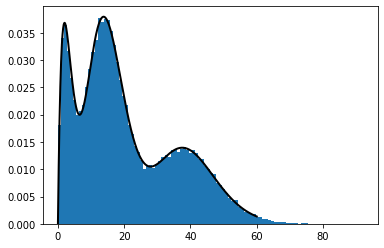

In [3]:
#  output a sample from 1 to n inclusive such that number i has probability p[i]
def discrete_sampler(p):
    cumsump = np.cumsum(p)
    n = len(p)
    sample = np.random.uniform()

    for i in range(n):
        if sample < cumsump[i]:
            return i + 1
    return n


#  return a sample from the mixture
def mixture_chi_squared():
    choice = discrete_sampler([0.2, 0.5, 0.3])
    
    v = [4, 16, 40]
    return rejection_sampler(*get_params(v[choice - 1]))

sample_no = 100000
mixture_samples = [mixture_chi_squared() for i in range(sample_no)]

#  plot the histogram and density
def plot_mixture(mixture_samples):
    plt.hist(mixture_samples, density = True, bins=100)
    
    w = [0.2, 0.5, 0.3]
    nu = [4, 16, 40]
    def mixture_density (x, w, nu):
        return w[0]*eval_p(x, nu[0]) + w[1]*eval_p(x, nu[1]) + w[2]*eval_p(x, nu[2])
    xx = np.linspace(0, 60 , 1000)
    plt.plot(xx , mixture_density (xx , w, nu), color='k', linewidth=2)
    plt.savefig("Q2 plot")


plot_mixture(mixture_samples)